<a href="https://colab.research.google.com/github/FreMeli/Teo_Riesgo/blob/main/MP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

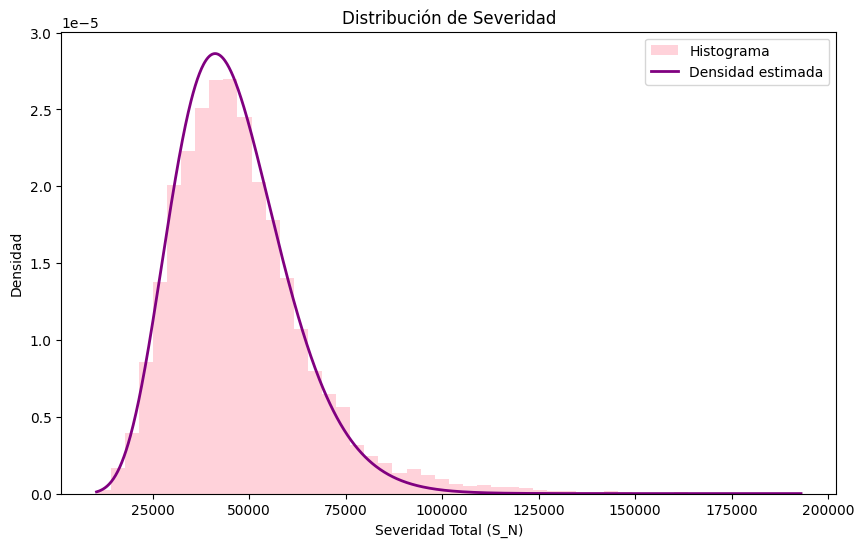

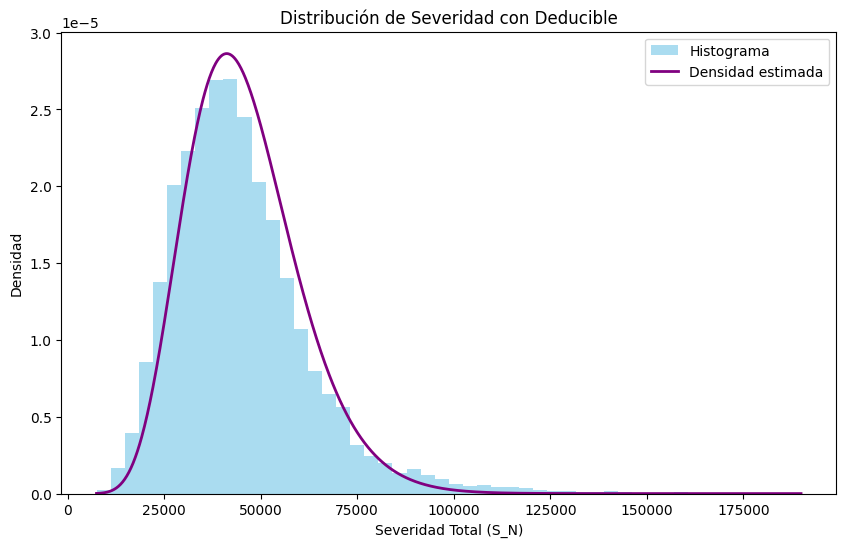

Media de la severidad total: 47961.679406724346
Desviación estándar de la severidad total: 18241.047756343036
Prima al 95% de confianza: 80007.54884691986
Media de la severidad con deducible: 44961.679406724346
Prima al 95% de confianza: 77007.54884691986


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom, gamma

# Función para generar muestras de una Binomial Negativa Extendida Truncada (BNET)
def rBnetTrunc(n, r, p):
    if r <= 0:
        raise ValueError("El parámetro 'r' debe ser positivo.")
    if p <= 0 or p > 1:
        raise ValueError("El parámetro 'p' debe estar en el rango (0, 1].")
    x = nbinom.rvs(n=r, p=p, size=n)  # Generar valores de la BNET
    x = x[x > 0]  # Truncar ceros
    while len(x) < n:  # Regenerar si faltan valores
        x = np.append(x, nbinom.rvs(n=r, p=p, size=1))
        x = x[x > 0]
    return x[:n]

# Función para generar severidades Gamma
def rGammaSeveridad(N, alpha, theta):
    return gamma.rvs(a=alpha, scale=theta, size=N)

# Parámetros para la primera y segunda BNET
# BNET primaria
B1 = 1.071570
r1 = 0.391308
p1 = 1 / B1

# BNET secundaria
B2 = 1.074204
r2 = 0.305293
p2 = 1 / B2

# Parámetros para la distribución Gamma (Severidad)
alpha = 9.90647466038417
theta = 4625.09948900876

# Número de simulaciones
num_simulaciones = 11000

# Vectores para almacenar las severidades totales
Severidad_Total = np.zeros(num_simulaciones)
Severidad_Deducible = np.zeros(num_simulaciones)
d = 3000

# Simulación combinada
np.random.seed(123)
for i in range(num_simulaciones):
    # Frecuencia (N) simulada
    N = rBnetTrunc(1, r1, p1)[0]
    # Severidades simuladas si N > 0
    if N > 0:
        Severidades = rGammaSeveridad(N, alpha, theta)
        Severidad_Total[i] = np.sum(Severidades)
        Severidad_Deducible[i] = max(Severidad_Total[i] - d, 0)
    else:
        Severidad_Total[i] = 0

# Visualización: Histograma de la severidad total
plt.figure(figsize=(10, 6))
plt.hist(Severidad_Total, bins=50, color='pink', density=True, alpha=0.7, label='Histograma')
plt.plot(np.linspace(min(Severidad_Total), max(Severidad_Total), 1000),
         gamma.pdf(np.linspace(min(Severidad_Total), max(Severidad_Total), 1000),
                   a=alpha, scale=theta),
         color='purple', lw=2, label='Densidad estimada')
plt.title("Distribución de Severidad")
plt.xlabel("Severidad Total (S_N)")
plt.ylabel("Densidad")
plt.legend()
plt.show()

# Histograma de la severidad con deducible
plt.figure(figsize=(10, 6))
plt.hist(Severidad_Deducible, bins=50, color='skyblue', density=True, alpha=0.7, label='Histograma')
plt.plot(np.linspace(min(Severidad_Deducible), max(Severidad_Deducible), 1000),
         gamma.pdf(np.linspace(min(Severidad_Deducible), max(Severidad_Deducible), 1000),
                   a=alpha, scale=theta),
         color='purple', lw=2, label='Densidad estimada')
plt.title("Distribución de Severidad con Deducible")
plt.xlabel("Severidad Total (S_N)")
plt.ylabel("Densidad")
plt.legend()
plt.show()

# Estadísticas descriptivas
media = np.mean(Severidad_Total)
desviacion = np.std(Severidad_Total)
cuantiles_tot = np.quantile(Severidad_Total, 0.95)
media_deducible = np.mean(Severidad_Deducible)

# Estadísticas descriptivas
cuantiles_ded = np.quantile(Severidad_Deducible, 0.95)

# Mostrar estadísticas
print(f"Media de la severidad total: {media}")
print(f"Desviación estándar de la severidad total: {desviacion}")
print(f"Prima al 95% de confianza: {cuantiles_tot}")
print(f"Media de la severidad con deducible: {media_deducible}")
print(f"Prima al 95% de confianza: {cuantiles_ded}")


